<a href="https://colab.research.google.com/github/kienle371999/mxnet-text-to-image/blob/master/CNNs_week2%2B3_foundations_ND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Information
* Class: Special topics: Convolutional Neural Networks
* Class id: INT3414 22
* Lecturer: Nguyen Thi Ngoc Diep, Ph.D.
* Email: ngocdiep\atvnu.edu.vn
* Slide & code: https://github.com/chupibk/INT3414_22



---





# PyTorch packages and tensors

- In PyTorch, everything is a tensor!
  + from v.0.4.0, there is no distinction between Tensor and Variable anymore
- Commonly used packages: 
  + `torch` provides all the necessary Tensor operators
  + `torch.nn` provides neural network modules
  + `torch.optim` contains various optimization algorithms

---



### Importing packages and enable GPU


In [0]:
#import the package
import torch
import torch.nn as nn
import torch.optim as optim


In [0]:
torch.__version__

'1.4.0'

In [0]:
# Enable cuda GPU
use_cuda = True

In [0]:
print(torch.cuda.device_count()) 

1


In [0]:
print(torch.cuda.get_device_name(0)) 

Tesla K80


In [0]:
cuda0 = torch.device('cuda:0')

### Define some *tensors*

In [0]:
# data
x = torch.tensor(([2, 9], [1, 5], [3, 6]), dtype=torch.float) # 3x2 tensor
y = torch.tensor(([0], [1], [1]), dtype=torch.float)      # 3x1 tensor
x_test = torch.tensor(([4,8]), dtype=torch.float)             # 1x2 tensor

In [0]:
print(x.size())
print(y.size())

torch.Size([3, 2])
torch.Size([3, 1])


In [0]:
print(x)

tensor([[2., 9.],
        [1., 5.],
        [3., 6.]])


In [0]:
#Scale the data to range [0, 1]
x_max, _ = torch.max(x, 0)
x_test_max, _ = torch.max(x_test, 0)


x = torch.div(x, x_max)
x_test = torch.div(x_test, x_test_max)


In [0]:
print(x)

tensor([[0.6667, 1.0000],
        [0.3333, 0.5556],
        [1.0000, 0.6667]])


### GPU-enabled tensors


In [0]:
# a tensor of 4 observed data, each has 2 features
x = torch.randn(4, 2, device=cuda0, dtype=torch.float) ### NOTE: we assign device=cuda0

print(x)

tensor([[ 0.2141, -0.0354],
        [ 0.3934,  0.8518],
        [-0.7442,  0.1648],
        [ 0.0674,  1.0748]], device='cuda:0')




---






# A sample neural network for binary classification

## Using Autograd

In [0]:
#Let's get some data

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split

%matplotlib inline

x, y = datasets.make_moons(500, noise=0.2)

# Split into test and training data
x_train, x_test, y_train, y_test = train_test_split(x, y,
    test_size=0.25, random_state=73)


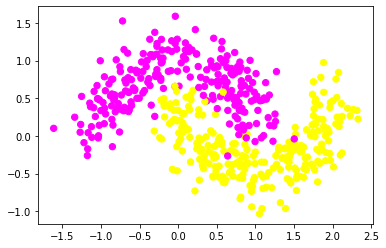

In [0]:
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1], s=40, c=y, cmap="spring")

In [0]:
x.shape

(500, 2)

In [0]:
#convert x, y to torch tensor
x_train_t  = torch.FloatTensor(x_train)
y_train_t = torch.FloatTensor(y_train).reshape(-1, 1)

#dimensions
D_in = x.shape[1] # Input dimension, = 2
H = 4 # hidden dimension, okay, let's use only one hidden layer
D_out = 1 # output dimension



#Initialize weights
# w1*x + bias --> h        ##hidden layer 1
# w2*h + bias --> output

# Setting requires_grad=True indicates that we want to compute gradients
# with respect to these tensors during the backward pass
w1 = torch.randn(D_in, H, dtype=torch.float, requires_grad=True) 
w2 = torch.randn(H, D_out, dtype=torch.float, requires_grad=True)


# Train = do feedforward + compute loss + backprop + update

lr = 0.01 #learning rate
loss_func = nn.BCELoss()
for t in range(5000): #epochs
  #forward pass: compute predicted y
  h = x_train_t.mm(w1)
  h_relu = h.clamp(min=0)
  output = h_relu.mm(w2)
  y_pred = torch.sigmoid(output)


  #compute and print loss
  # # loss is a Tensor of shape (1, )
  loss = loss_func( y_pred, y_train_t)

  if t % 100 == 99:
    print(t, loss.item())
  
  # backprop to compute gradients of w1 and w2 with respect to loss
  # for simplicity, let's use Autograd :)
  # This call will compute the
  # gradient of loss with respect to all Tensors with requires_grad=True.
  # After this call w1.grad and w2.grad will be Tensors holding the gradient
  # of the loss with respect to w1 and w2 respectively.
  loss.backward()


  # Manually update weights using gradient descent
  # temporarily set all requies_grad flag to false in order to update weights
  with torch.no_grad():
    w1 -= lr * w1.grad
    w2 -= lr * w2.grad

    # manually zero the gradients after updating weights
    # because PyTorch accumulates gradients on subsequent backward passes
    w1.grad.zero_()
    w2.grad.zero_()


99 0.7373479008674622
199 0.6430650353431702
299 0.6290316581726074
399 0.6180451512336731
499 0.6065322756767273
599 0.595571756362915
699 0.5857638120651245
799 0.5768586993217468
899 0.5687994956970215
999 0.5615330934524536
1099 0.5549282431602478
1199 0.548872709274292
1299 0.5433372259140015
1399 0.538300633430481
1499 0.5337609052658081
1599 0.5295516848564148
1699 0.5256500840187073
1799 0.5220842957496643
1899 0.5187596678733826
1999 0.5156838893890381
2099 0.5129964351654053
2199 0.5108367800712585
2299 0.5089223384857178
2399 0.5071333050727844
2499 0.5055103898048401
2599 0.5039751529693604
2699 0.5024687051773071
2799 0.5010427236557007
2899 0.4996756613254547
2999 0.4983528256416321
3099 0.4970317780971527
3199 0.49565303325653076
3299 0.4942221939563751
3399 0.4927642345428467
3499 0.4913415014743805
3599 0.4899243712425232
3699 0.48838046193122864
3799 0.4868154227733612
3899 0.48558592796325684
3999 0.48444312810897827
4099 0.48338353633880615
4199 0.4825632870197296
4

## PyTorch: nn module

Provide higher-level abstractions over raw computational graphs that are useful for building neural networks.

In [0]:
import torch
import torch.nn as nn
import numpy as np

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

x, y = datasets.make_moons(500, noise=0.2)

# Split into test and training data
x_train, x_test, y_train, y_test = train_test_split(x, y,
    test_size=0.25, random_state=73)

#convert to tensors
x_train_t  = torch.FloatTensor(x_train)
y_train_t = torch.FloatTensor(y_train).reshape(-1, 1)


99 0.32643601298332214
199 0.2757432162761688
299 0.25963324308395386
399 0.25024038553237915
499 0.24700400233268738
599 0.24559710919857025
699 0.24482783675193787
799 0.24415405094623566
899 0.24353250861167908
999 0.24309110641479492


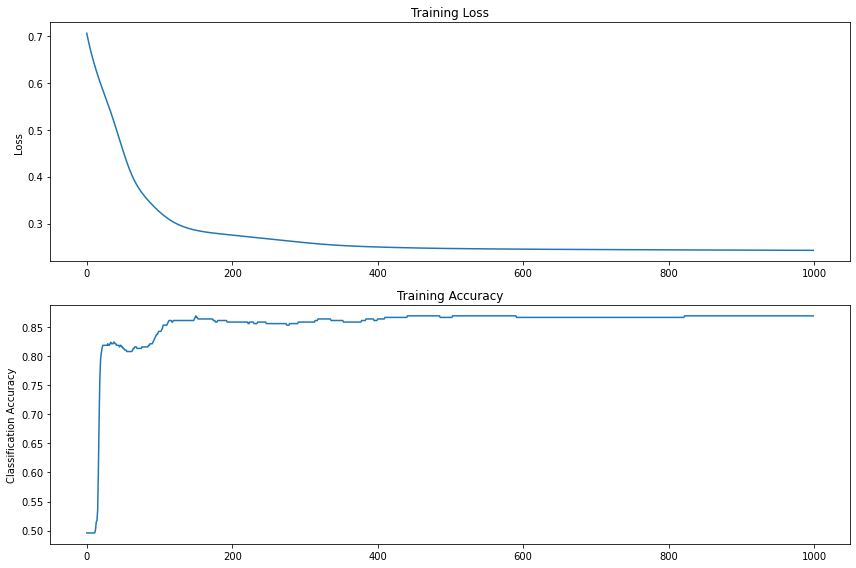

In [0]:
import numpy as np

# random input and output data
D_in, H, D_out = 2, 4, 1

# use nn package to define our model as a sequence of layers.
# nn.Sequential is a Module which contains other modules, and applies them in sequences to produce its output.
# Each Linear Module computes output from input using a linear function, and holds internal Tensors for its weight and bias

model = nn.Sequential(
    nn.Linear(D_in, H),
    nn.ReLU(),
    nn.Linear(H, D_out),
    nn.Sigmoid()
)

# nn package also contains defiinitions of popular loss functions
loss_fn = nn.BCELoss()
lr = 0.01 #learning rate
optimizer = torch.optim.Adam(
      model.parameters(),
      lr=lr
)

# log
train_loss = []
train_accuracy = []
for t in range(1000): #num epochs
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x_train_t)

    # Compute and print loss.
    loss = loss_fn(y_pred, y_train_t)
    if t % 100 == 99:
        print(t, loss.item())

    # Clear the buffers of all gradients before backward pass 
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its parameters
    optimizer.step()

    #log the training info
    y_pred_class = np.where(y_pred.detach().numpy()<0.5, 0, 1)
    accuracy = np.sum(y_train.reshape(-1, 1) == y_pred_class) / len(y_train)
    train_accuracy.append(accuracy)  
    train_loss.append(loss.item())

  

#visualize the training log
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(train_loss)
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Loss')

ax[1].plot(train_accuracy)
ax[1].set_ylabel('Classification Accuracy')
ax[1].set_title('Training Accuracy')

plt.tight_layout()
plt.show()

## More complex model

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class DynamicNet(nn.Module):
  def __init__(self, D_in, H, D_out):
    '''
    construct layer instances that we will use in forward pass
    '''
    super(DynamicNet, self).__init__()
    self.input_linear = nn.Linear(D_in, H)
    self.middle_linear = nn.Linear(H, H)
    self.output_linear = nn.Linear(H, D_out)


  def forward(self, x):
    '''
    build the computation graph
    '''
    x = self.input_linear(x)
    x = F.relu(x)
    
    for _ in range(4): #we'll have 4 hidden layers
      x = self.middle_linear(x)
      x = F.relu(x)
    x = self.output_linear(x)
    out = torch.sigmoid(x)
    
    return out



#data
D_in, H, D_out = 2, 4, 1


model = DynamicNet(D_in, H, D_out)

# Construct our loss function and an Optimizer. Training this strange model with
# vanilla stochastic gradient descent is tough, so we use momentum
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
for t in range(1000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_train_t)

    # Compute and print loss
    loss = criterion(y_pred, y_train_t)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()




99 0.3758455812931061
199 0.19530275464057922
299 0.13623546063899994
399 0.13012175261974335
499 0.1267622709274292
599 0.12296771258115768
699 0.12078988552093506
799 0.11968906968832016
899 0.11874430626630783
999 0.11808303743600845


## Performance evaluation on test data

In [0]:
# Evaluate the performance on test data
from sklearn.metrics import accuracy_score

# convert to tensor
x_test_t = torch.FloatTensor(x_test)

# do the forward pass
y_pred = model(x_test_t)

#get the predicted classes
y_pred_class = np.where(y_pred.detach().numpy()<0.5, 0, 1)
score = accuracy_score(y_pred_class, y_test)

print(score)

#or do it manually
accuracy = np.sum(y_test.reshape(-1, 1) == y_pred_class) / len(y_test)
print(accuracy)

0.888
0.888


In [0]:
# Forward pass
y_pred = model(x_train_t)

# Compute loss.
loss = loss_fn(y_pred, y_train_t)

# Clear gradient buffers 
optimizer.zero_grad()

# Backward pass: compute gradients
loss.backward()

# Update parameters
optimizer.step()

# Understand backpropagation

(out of scope for INT3414_22)

# Example Convolutional Neural Network

### Load the MNIST dataset


In [0]:
import torch
import torchvision

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST("/files/", train=True, download=True,
                               transform=torchvision.transforms.Compose([
                                  torchvision.transforms.ToTensor(),
                                  torchvision.transforms.Normalize(
                                      (0.1307,), (0.3081,)
                                  )
                               ])),
    batch_size=64, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST("/files/", train=False, download=True,
                               transform=torchvision.transforms.Compose([
                                  torchvision.transforms.ToTensor(),
                                  torchvision.transforms.Normalize(
                                      (0.1307,), (0.3081,)
                                  )
                               ])),
    batch_size=64, shuffle=True
)

Extracting /files/MNIST/raw/train-images-idx3-ubyte.gz to /files/MNIST/raw


Extracting /files/MNIST/raw/train-labels-idx1-ubyte.gz to /files/MNIST/raw



Extracting /files/MNIST/raw/t10k-images-idx3-ubyte.gz to /files/MNIST/raw


Extracting /files/MNIST/raw/t10k-labels-idx1-ubyte.gz to /files/MNIST/raw
Processing...
Done!


In [0]:
arr = [ 0, 1, 2, 3]
arr2 = (i for i in arr)
print(type(arr))
type(arr2)


<class 'list'>


generator

In [0]:
arr

[0, 1, 2, 3]

In [0]:
next(arr2)

0

In [0]:
next(arr2)

1

In [0]:
list(arr2)

[2, 3]

In [0]:
|# let's display some data

examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.shape)



SyntaxError: ignored

|-> a data batch as a tensor of shape: `torch.Size([64, 1, 28, 28])` (i.e., [num_data, num_channel, height, width])

This means we have 64 examples of 28x28 pixels in 1 channel (grayscale).

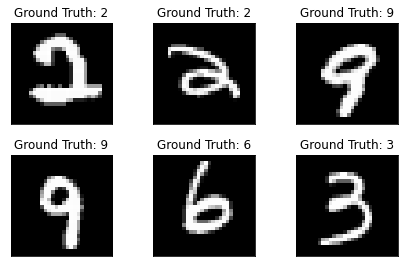

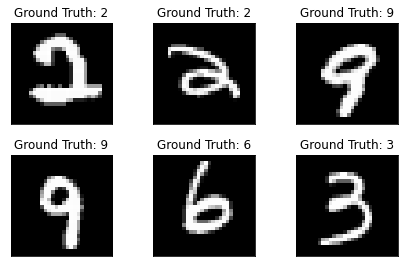

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

## Build a convolutional network

In [0]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size=5)   #https://pytorch.org/docs/stable/nn.html?highlight=conv2d#torch.nn.Conv2d
    self.conv2 = nn.Conv2d(10, 20, kernel_size=3)
    self.fc1 = nn.Linear(500, 50) # how to find this 500 as dimesion in?
    self.fc2 = nn.Linear(50, 10)
  
  def forward(self, x):
    x = self.conv1(x)
    x = F.max_pool2d(x, 2)
    x = F.relu(x)
    x = self.conv2(x)
    x = F.max_pool2d(x, 2)
    x = F.relu(x)
    x = torch.flatten(x, 1)
   
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.log_softmax(x, dim=1)
    return x


#28x28x1 -conv1-> (28-5+1)x(28-5+1) = 24x24x10 -maxpool--> 12x12x10 -conv2-> (12-3+1)x(12-3+1)x20=10x10x20 -maxpool-> 5x5x20 =500


In [0]:
model = MyModel()

#calculate total parameters .  #--> confirm this by hand :)
# conv1: 5x5x1x10 + 10 + 3x3x10x20 + 20 + 500x50+50 +50x10+10
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total parameters: ", num_params)

Total parameters:  27640


In [0]:

n_epochs = 3
batch_size = 64
learning_rate = 0.01
log_interval = 10

loss = F.nll_loss
optimizer = optim.Adam(model.parameters(),
                       lr=learning_rate,
                     )

train_losses = []
train_counter = []
for epoch in range(1, n_epochs+1):
  for batch_idx, (data, target) in enumerate(train_loader):
    #forward
    output = model(data)
    #loss
    loss = F.nll_loss(output, target)

    #backward
    optimizer.zero_grad()
    loss.backward()
    #update
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.300459
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.088380
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.564932
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.243718
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.373786
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.156407
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.246752
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.104116
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.323688
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.090788
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.104670
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.079260
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.078546
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.019299
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.038965
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.107725
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.108383
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.124631
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.105505
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.027502
Train Epoch: 1 [12800/60000 (

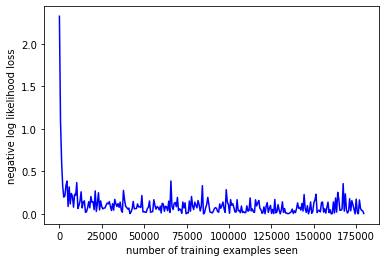

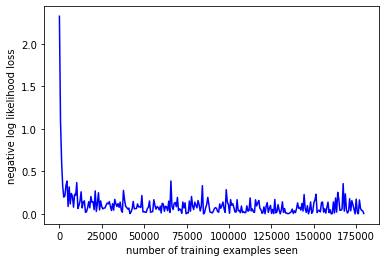

In [0]:
#Visualize the training loss
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

# Implementation of AlexNet


In [0]:
class AlexNet(nn.Module):

    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# HOMEWORK

1. Evaluate the model on test data
  + Run the model
  + Calculate precision, accuracy, F1 score
2. Save the model and call the model from saved file
3. Create checkpoint during training and Implement training resume from checkpoint
  + Hint: During training, save both network state and optimizer state

  ```
  # torch.save(network.state_dict(), '/results/model.pth')
  # torch.save(optimizer.state_dict(), '/results/optimizer.pth')
  ```

# References

* https://pytorch.org/tutorials/beginner/pytorch_with_examples.html
* https://www.datahubbs.com/deep-learning-101-first-neural-network-with-pytorch/
* https://nextjournal.com/gkoehler/pytorch-mnist
* https://github.com/pytorch/vision/blob/master/torchvision/models/alexnet.py


*** Unrelated Places for math --> unused

$X \in \mathbb{R}^{4\times m}$

$H^{(1)} \in \mathbb{R}^{4\times m}$

$W^{(1)} \in \mathbb{R}^{4\times 4}$


$H^{(2)} \in \mathbb{R}^{3\times m}$

$W^{(2)} \in \mathbb{R}^{3\times 4}$

$y \in \mathbb{R}^{1\times m}$

$W^{(3)} \in \mathbb{R}^{1\times 3}$


$W^{(1)}X + B^{(1)} = H^{(1)}$

$W^{(2)}H^{(1)} + B^{(2)} = H^{(2)}$

$W^{(3)}H^{(2)} + B^{(3)} = y $

$X \in \mathbb{R}^{1024\times m}$


$W^{(1)} \in \mathbb{R}^{1024\times 4}$

$X \in \mathbb{R}^{1024\times m}$


$W^{(1)} \in \mathbb{R}^{1024\times 4}$

$X \in \mathbb{R}^{1048576\times m}$


$W^{(1)} \in \mathbb{R}^{1048576\times 4}$

